In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import optimizers, utils
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Conv1D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
    MaxPooling1D,
    Concatenate,
    GlobalAveragePooling2D,
    Input,
)

print(
    "Version:%s" % tf.__version__,
    "\nCUDA:%s" % tf.test.is_built_with_cuda(),
    "\nGPU:%s" % tf.test.is_built_with_gpu_support(),
)

Version:2.2.0-rc3 
CUDA:True 
GPU:True


In [2]:
trainData = np.load("trainData.npy", allow_pickle=True)
trainLabel = np.load("trainLabel.npy", allow_pickle=True)
validData = np.load("validData.npy", allow_pickle=True)
validLabel = np.load("validLabel.npy", allow_pickle=True)
testData = np.load("testData.npy", allow_pickle=True)
testLabel = np.load("testLabel.npy", allow_pickle=True)

In [3]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
le = preprocessing.LabelEncoder()
le.fit(trainLabel)
trainLabel = le.transform(trainLabel)
validLabel = le.transform(validLabel)
testLabel = le.transform(testLabel)


In [4]:
def mlp(shape: int):
    """創建多層感知機
    
    Arguments:
        shape {int} -- [矩陣維度]
    
    Returns:
        Sequential 
    """
    return Sequential(
        [
            Dense(256, input_shape=(shape,), activation="relu"),
            Dropout(0.5),
            Dense(128, activation="relu"),
            Dropout(0.5),
            Dense(128, activation="relu"),
            Dropout(0.5),
            Dense(128, activation="relu"),
            Dense(2, activation="softmax"),
        ]
    )


def cnn(shape: tuple):
    """創建多層二維迴旋積分網絡
    
    Arguments:
        shape {tuple} -- [矩陣維度]
    
    Returns:
        Sequential 
    """
    Concatenate
    shape1, shape2, shape3 = shape
    inputA = Input((shape2, shape3))
    x_1 = Conv1D(filters=64, kernel_size=3, activation="relu", padding="same",)(inputA)
    x_1 = Flatten()(x_1)
    x_2 = Conv1D(filters=128, kernel_size=5, activation="relu", padding="same",)(inputA)
    x_2 = Flatten()(x_2)
    combined = Concatenate()([x_1, x_2])
    drop_1 = Dropout(0.7)(combined)
    Den_1 = Dense(256, activation="relu")(drop_1)
    Den_2 = Dense(2, activation="softmax")(Den_1)
    model = Model(inputs=inputA, outputs=Den_2)
    return model

In [5]:
model = mlp(trainData.shape[1])

In [6]:
model.compile(
    optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [7]:
trainLabel = utils.to_categorical(trainLabel)
validLabel = utils.to_categorical(validLabel)
testLabel = utils.to_categorical(testLabel)

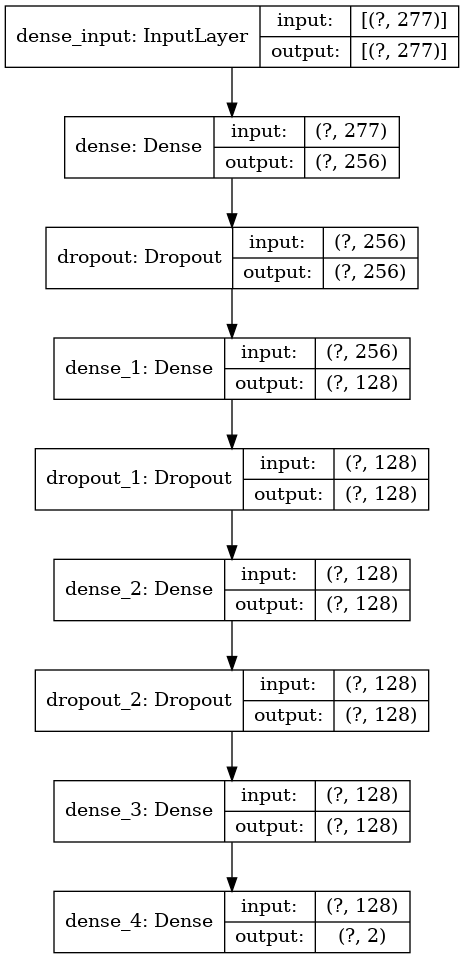

In [8]:
utils.plot_model(
    model, show_shapes=True,
)

In [9]:
history = model.fit(
    trainData,
    trainLabel,
    validation_data=(validData, validLabel),
    verbose=0,  # 不顯示過程
    epochs=200,
    batch_size=128,
)

In [10]:
model.evaluate(validData, validLabel)

3/3 [==============================] - 0s 976us/step - loss: 0.6233 - accuracy: 0.8846


[0.6233149170875549, 0.8846153616905212]

In [11]:
model.evaluate(testData, testLabel)

3/3 [==============================] - 0s 809us/step - loss: 0.8455 - accuracy: 0.9250


[0.8455209136009216, 0.925000011920929]

[Text(0, 0.5, 'withMask'), Text(0, 1.5, 'without')]

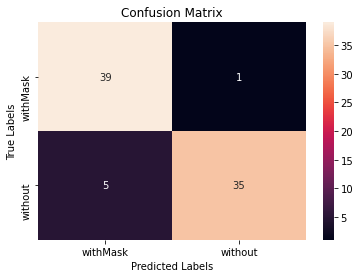

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt  

yp=model.predict(testData)
yp=np.argmax(yp,axis=1)
yt=np.argmax(testLabel,axis=1)
   

ax= plt.subplot()
cm=confusion_matrix(yt, yp)
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["withMask","without"])
ax.yaxis.set_ticklabels(["withMask","without"])

In [13]:
model2 = cnn(trainData.reshape(780, 277, 1).shape)

In [14]:
model2.compile(
    optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

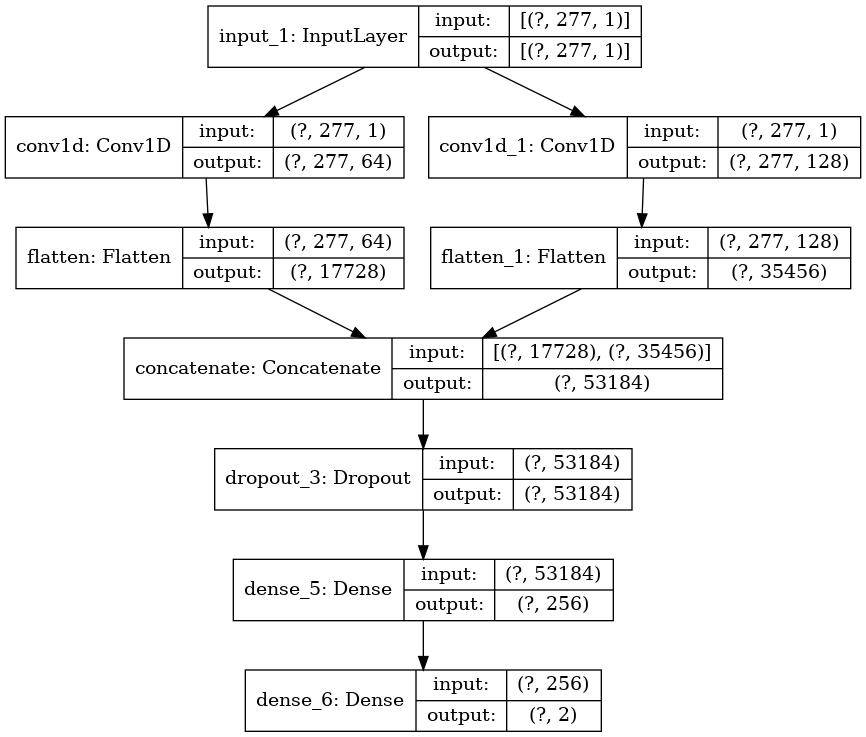

In [15]:
utils.plot_model(
    model2, show_shapes=True,
)

In [16]:
history2 = model2.fit(
    trainData.reshape(780, 277, 1),
    trainLabel,
    validation_data=(validData.reshape(78, 277, 1), validLabel),
    verbose=0,  # 不顯示過程
    epochs=60,
    batch_size=32,
)

In [17]:
model2.evaluate(validData.reshape(78, 277, 1), validLabel)

3/3 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.8718


[0.66900634765625, 0.8717948794364929]

In [18]:
model2.evaluate(testData.reshape(80, 277, 1), testLabel,batch_size=1,)

80/80 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.8625


[0.7007026672363281, 0.862500011920929]

[Text(0, 0.5, 'withMask'), Text(0, 1.5, 'without')]

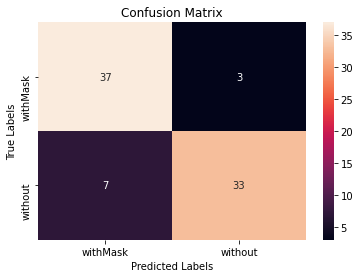

In [24]:


yp=model2.predict(testData.reshape(80, 277, 1))
yp=np.argmax(yp,axis=1)
yt=np.argmax(testLabel,axis=1)
   

ax= plt.subplot()
cm=confusion_matrix(yt, yp)
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["withMask","without"])
ax.yaxis.set_ticklabels(["withMask","without"])